# Naive Bayes
나이브 베이즈(Naive Bayes)는 확률을 기반 머신러닝 분류 알고리즘이다.
나이브 베이즈 분류 알고리즘은 데이터를 단순(Naive)하고 독립적인 사건으로 가정하고 이 독립사건들을 베이즈 이론에 대입하여 가장 높은 확률의 레이블로 분류하는 알고리즘이다.
<br/>
***
# Gaussian Naive Bayes
분류 특징들의 값이 정규(Gaussian) 분포되어 있다는 가정 하에 조건부 확률을 계산하며 연속적인 성질이 있는 특성 데이터를 분류하는데 적합하다.
$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$
P(A): 어떤 사건 A가 일어날 확률
P(B): 어떤 사건 B가 일어날 확률
P(A|B): 어떤 사건 B가 일어났을 때 사건 A가 일어날 확률
P(B|A): 어떤 사건 A가 일어났을 때 사건 B가 일어날 확률

# Bernoulli Naive Bayes
분류 데이터의 특징이 0 또는 1로 표현될 때 데이터의 출현 여부에 따라서 0 또는 1로 구분되는 데이터에 사용된다.
***
# Multinomial Naive Bayes
분류 데이터의 특징이 출현 횟수로 표현될 때 데이터의 출현 횟수에 따라 값을 달리하는 데이터에 사용된다.

Gaussian Naive Bayes를 활용한 붓꽃 분류
iris 데이터를 활용하여 데이터의 특징에 따라 붓꽃의 종류를 구분한다.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris  # scikit-learn이 제공하는 붓꽃(iris) 데이터를 불러오기 위해 import 한다.
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes 모델로 iris 데이터를 분류하기 위해 import 한다.
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

1. 데이터 획득
scikit-learn에서 제공하는 붓꽃(iris) 데이터셋을 사용한다.

In [2]:
dataset = load_iris()  # iris 데이터셋을 불러온다.
# print(type(dataset))
# print(dataset)
# print(dataset.data)
# print(dataset.feature_names)
# sepal length: 꽃받침 길이, sepal width: 꽃받침 너비, petal length: 꽃잎 길이, petal width: 꽃잎 너비
# print(dataset.target_names) # setosa: 0, versicolor: 1, virginica: 2 → 레이블, 결과(답), 클래스, 타겟
# print(dataset.target)
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.target = df.target.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


2. 데이터 시각화

In [3]:
setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target == 'versicolor']
virginica_df = df[df.target == 'virginica']
setosa_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


꽃받침 길이

<AxesSubplot: >

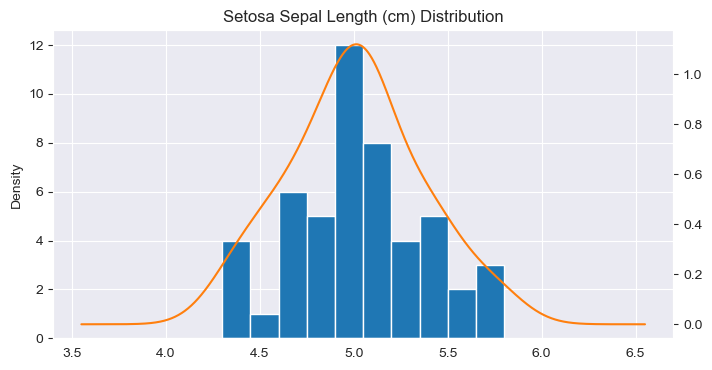

In [4]:
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, figsize=(8, 4),
                                    title='Setosa Sepal Length (cm) Distribution')

<AxesSubplot: >

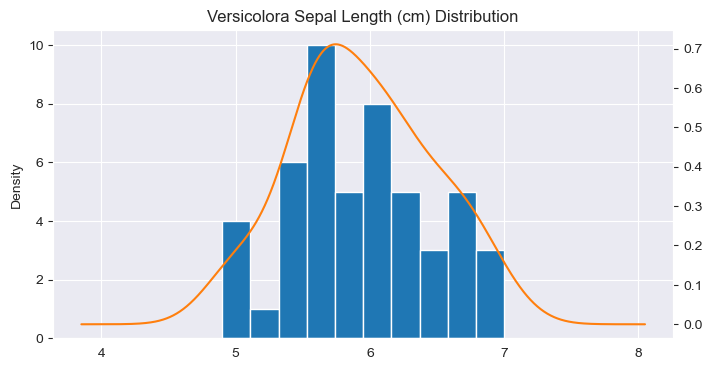

In [5]:
ax = versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, figsize=(8, 4),
                                        title='Versicolora Sepal Length (cm) Distribution')

<AxesSubplot: >

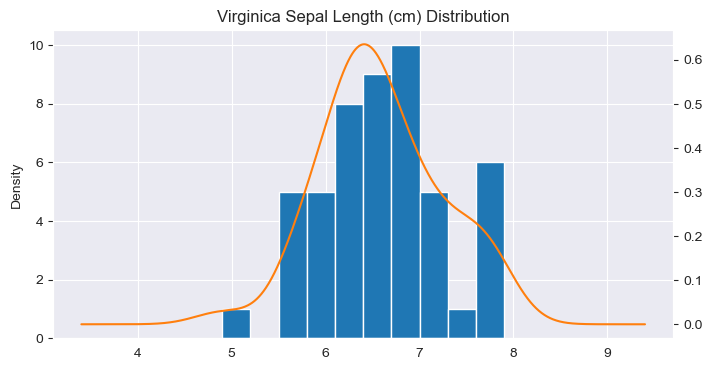

In [6]:
ax = virginica_df['sepal length (cm)'].plot(kind='hist')
virginica_df['sepal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, figsize=(8, 4),
                                       title='Virginica Sepal Length (cm) Distribution')

3. 데이터 다듬기

In [7]:
# 전체 데이터의 20%를 테스트 데이터로 분리하고 나머지 80%를 학습에 사용한다.
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)
print(f'X_train: {len(X_train)}, X_test: {len(X_test)})')
print(f'y_train: {len(y_train)}, y_test: {len(y_test)})')
print(f'[꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비](문제): {X_train[0]}, 품종(답): {y_train[0]}')

X_train: 120, X_test: 30)
y_train: 120, y_test: 30)
[꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비](문제): [6.9 3.2 5.7 2.3], 품종(답): 2


In [8]:
model = GaussianNB()  # GaussianNB 모델 객체를 만든다.
model.fit(X_train, y_train)  # GaussianNB 모델을 학습시킨다.

GaussianNB()

4. 모델 테스트

In [9]:
predict = model.predict(X_test)  # 학습 데이터로 학습한 결과에 따른 테스트 데이터의 예측값을 계산한다.
print(classification_report(y_test, predict))  # classification_report(실제값, 예측값)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.82      0.86        11
           2       0.80      0.89      0.84         9

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [10]:
print(f'정확도: {accuracy_score(y_test, predict):.2f}')

정확도: 0.90


In [11]:
comparison = pd.DataFrame({'실제값': y_test, '예측값': predict})
comparison

,실제값,예측값
0,2,2
1,1,1
2,1,1
3,2,2
4,1,1
5,0,0
6,2,2
7,1,1
8,2,2
9,1,1
